In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error


In [3]:
df = pd.read_csv("sales_forecasting.csv", encoding='latin1')


In [5]:
df = pd.read_csv("sales_forecasting.csv", encoding_errors='ignore')


In [6]:
print(df.head())
print(df.columns)


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')


In [9]:
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_4048\77231383.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()


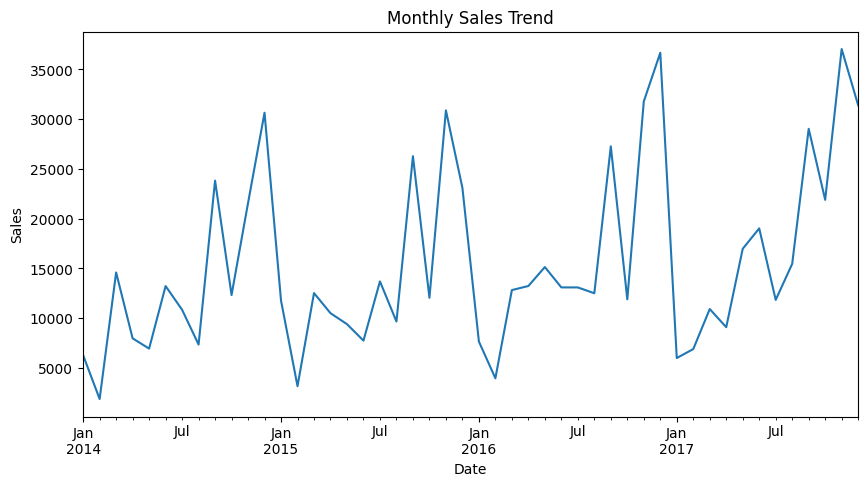

In [10]:
monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [11]:
train = monthly_sales[:-3]
test = monthly_sales[-3:]


In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend='add')
fit = model.fit()
forecast = fit.forecast(3)


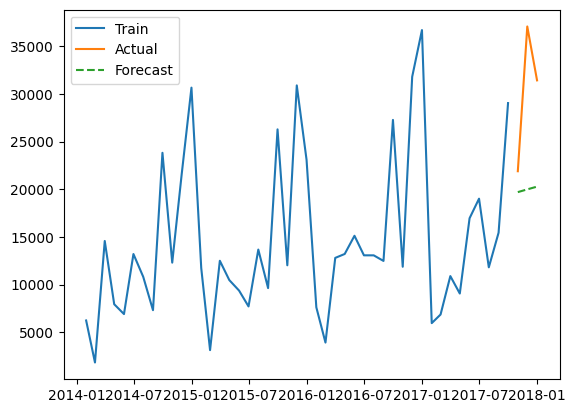

In [13]:
plt.plot(train, label="Train")
plt.plot(test, label="Actual")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, forecast)
print("MAE:", mae)


MAE: 10132.137008228483


In [15]:
forecast_df = pd.DataFrame({
    "Date": test.index,
    "Actual Sales": test.values,
    "Forecasted Sales": forecast.values
})

forecast_df.to_csv("forecast_output.csv", index=False)
